[source of data](https://www.kaggle.com/datasets/supremeleaf/mlb-hitting-leaders-2019-2022)


# Goals for notebook


We have data from the past 4 complete seasons of MLB baseball that show the top offensive player's and their respective numbers. We want to analyze how these numbers relate to each other and how they impact the total number of Home Runs and Runs Batted In.

---

1. **Load the data** into a pandas DataFrame

--- 

2. **Clean data** (if necessary)
    - See if there are any missing values

---

3. **Exploratory Data Analysis** (EDA)
    - Make histograms of OPS, AVG
    - See which teams had the most RBI's and HomeRuns

---
4. **Feature Engineering**
    - Make new columns describing any intersting additional statistics (for example show each player's walks to strikeout ratio)
 
---
5. **Get the data ready for a machine learning model**
    - We want to see if we can build a model to predict Home Runs and or RBI's based on other features. 
 
---

6. **Evaluate our model's metrics** and see if we can improve it.

## Load Data

In [1]:
import os

os.listdir()

['.git',
 '.ipynb_checkpoints',
 '2019-2022 MLB Hitting Leaders CSV (UTF-8).csv',
 'MLB Hitting Leaders 2019-2022.ipynb']

In [2]:
import pandas as pd 

df = pd.read_csv(os.listdir()[2])

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,62,131,111,175,16,3,0.311,0.425,0.686,1.111
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,37,97,78,106,1,1,0.306,0.406,0.613,1.019
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,35,115,79,141,7,0,0.317,0.404,0.578,0.982
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,28,57,66,87,18,1,0.300,0.387,0.533,0.920
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,21,100,84,102,13,3,0.325,0.407,0.511,0.918


## Descriptive Statistics and Data Visualisation

In [3]:
desc_stats = df.describe()

desc_stats

,Year,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,2020.476809,121.129870,445.103896,66.933210,118.192950,23.812616,1.964750,19.302412,64.020408,45.777365,101.961039,7.231911,2.293135,0.264171,0.338481,0.456505,0.794985
std,1.111331,40.704413,154.741769,26.713946,44.520534,10.430873,1.964523,11.058118,27.534661,22.935552,42.920870,8.198968,2.386332,0.030388,0.033779,0.070663,0.095562
min,2019.000000,44.000000,154.000000,13.000000,32.000000,3.000000,0.000000,0.000000,10.000000,5.000000,12.000000,0.000000,0.000000,0.176000,0.238000,0.266000,0.552000
25%,2019.500000,60.000000,232.500000,42.500000,68.000000,15.000000,0.000000,11.000000,41.000000,28.000000,64.000000,1.000000,0.000000,0.245000,0.316000,0.409000,0.731000
50%,2020.000000,140.000000,499.000000,71.000000,130.000000,25.000000,2.000000,17.000000,65.000000,45.000000,103.000000,4.000000,2.000000,0.265000,0.338000,0.450000,0.788000
75%,2021.000000,150.500000,555.500000,86.500000,150.000000,31.000000,3.000000,28.000000,85.000000,59.000000,134.000000,10.000000,3.000000,0.283000,0.358000,0.503000,0.850000
max,2022.000000,162.000000,681.000000,135.000000,206.000000,58.000000,10.000000,62.000000,131.000000,145.000000,213.000000,47.000000,12.000000,0.364000,0.490000,0.695000,1.185000


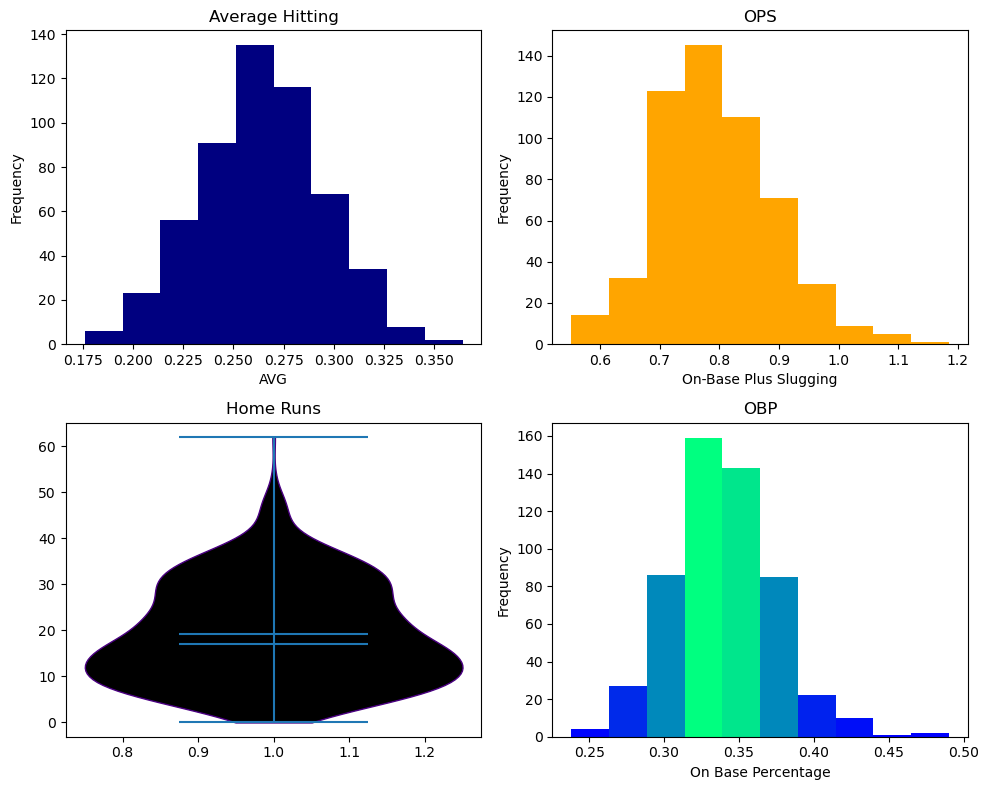

In [50]:
import matplotlib.pyplot as plt 
from matplotlib import colors

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)

ax1.hist(df['AVG'], color='navy')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('AVG')
ax1.set_title('Average Hitting')

ax2.hist(df['OPS'], color='orange')
ax2.set_xlabel('On-Base Plus Slugging')
ax2.set_ylabel('Frequency')
ax2.set_title('OPS')

violin = ax3.violinplot(df['HR'], showmeans=True, showmedians=True)

for ii in violin['bodies']:
    ii.set_color('black')
    ii.set_edgecolor('indigo')
    ii.set_alpha(1)
    
ax3.set_title('Home Runs')

N, bins, patches = ax4.hist(df['OBP'])
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.winter(norm(thisfrac))
    thispatch.set_facecolor(color)
    
ax4.set_xlabel('On Base Percentage')
ax4.set_ylabel('Frequency')
ax4.set_title('OBP')

plt.show()

See how player position factors into runs and RBI's.

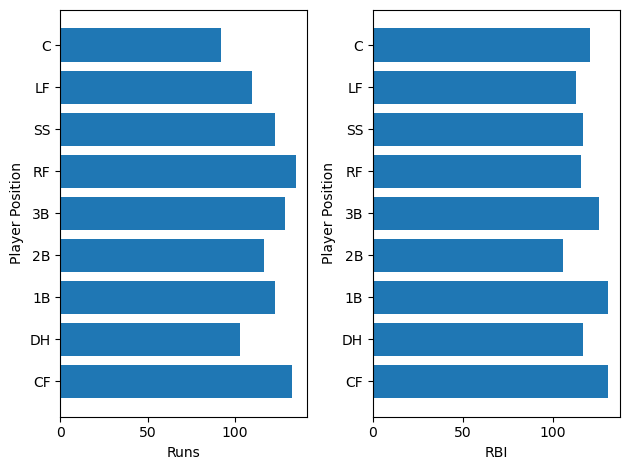

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)

ax1.barh(df['Player Position'], df['R'])
ax1.set_xlabel('Runs')
ax1.set_ylabel('Player Position')

ax2.barh(df['Player Position'], df['RBI'])
ax2.set_xlabel('RBI')
ax2.set_ylabel('Player Position')

plt.show()

## Feature Engineering

Let's manipulate the data to see if we can extract any more interesting features.  

In [51]:
df.head(10)

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,62,131,111,175,16,3,0.311,0.425,0.686,1.111
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,37,97,78,106,1,1,0.306,0.406,0.613,1.019
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,35,115,79,141,7,0,0.317,0.404,0.578,0.982
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,28,57,66,87,18,1,0.300,0.387,0.533,0.920
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,21,100,84,102,13,3,0.325,0.407,0.511,0.918
5,2022,Manny Machado,3B,SD,150,578,100,172,37,1,32,102,63,133,9,1,0.298,0.366,0.531,0.897
6,2022,Nolan Arenado,3B,STL,148,557,73,163,42,1,30,103,52,72,5,3,0.293,0.358,0.533,0.891
7,2022,Rafael Devers,3B,BOS,141,555,84,164,42,1,27,88,50,114,3,1,0.295,0.358,0.521,0.879
8,2022,Austin Riley,3B,ATL,159,615,90,168,39,2,38,93,57,168,2,0,0.273,0.349,0.528,0.877
9,2022,Shohei Ohtani,DH,LAA,157,586,90,160,30,6,34,95,72,161,11,9,0.273,0.356,0.519,0.875


In [52]:
run_to_hit_ratio = df.R / df.H

run_to_hit_ratio

0      0.751412
1      0.659722
2      0.595506
3      0.651899
4      0.587940
         ...   
534    0.575472
535    0.508772
536    0.472000
537    0.603448
538    0.463636
Length: 539, dtype: float64

Create a run-to-hit ratio

In [53]:
df['run_to_hit_ratio'] = df['R'] / df['H']

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,...,131,111,175,16,3,0.311,0.425,0.686,1.111,0.751412
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,...,97,78,106,1,1,0.306,0.406,0.613,1.019,0.659722
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,...,115,79,141,7,0,0.317,0.404,0.578,0.982,0.595506
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,...,57,66,87,18,1,0.300,0.387,0.533,0.920,0.651899
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,...,100,84,102,13,3,0.325,0.407,0.511,0.918,0.587940


In [54]:
strikeout_rate = df['SO'] / df['AB']

strikeout_rate

0      0.307018
1      0.225532
2      0.251337
3      0.165085
4      0.166667
         ...   
534    0.303534
535    0.234000
536    0.235887
537    0.276471
538    0.220648
Length: 539, dtype: float64

Create a strikeout rate

In [55]:
df['strikeout_rate'] = df['SO'] / df['AB']

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,BB,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,...,111,175,16,3,0.311,0.425,0.686,1.111,0.751412,0.307018
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,...,78,106,1,1,0.306,0.406,0.613,1.019,0.659722,0.225532
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,...,79,141,7,0,0.317,0.404,0.578,0.982,0.595506,0.251337
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,...,66,87,18,1,0.300,0.387,0.533,0.920,0.651899,0.165085
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,...,84,102,13,3,0.325,0.407,0.511,0.918,0.587940,0.166667


In [67]:
df['AVG'] * df['OBP'] * df['SLG'] * df['OPS']

0      0.100737
1      0.077604
2      0.072691
3      0.056931
4      0.062050
         ...   
534    0.016963
535    0.015866
536    0.016437
537    0.014487
538    0.013982
Length: 539, dtype: float64

Multiply all the percentages to get an overall offensive score.

In [68]:
df['AVG * OBP * SLG * OPS'] = df['AVG'] * df['OBP'] * df['SLG'] * df['OPS']

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate,AVG * OBP * SLG * OPS
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,...,175,16,3,0.311,0.425,0.686,1.111,0.751412,0.307018,0.100737
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,...,106,1,1,0.306,0.406,0.613,1.019,0.659722,0.225532,0.077604
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,...,141,7,0,0.317,0.404,0.578,0.982,0.595506,0.251337,0.072691
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,...,87,18,1,0.300,0.387,0.533,0.920,0.651899,0.165085,0.056931
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,...,102,13,3,0.325,0.407,0.511,0.918,0.587940,0.166667,0.062050


## Build a machine learning model

Let's get our data ready for a machine learning model by:

- Transforming any categorical variables into numeric ones
- Deal with any missing values (if there are any)

### Are there any missing values? 

### Turning strings into numeric values